# APS 5 - Questões com auxílio do Pandas

** Nome: ** <font color=blue> Thomas Pilnik </font>


APS **INDIVIDUAL**

Data de Entrega: 26/Set até às 23h59 via GitHub.

Vamos trabalhar com dados do USGS (United States Geological Survey) para tentar determinar se os abalos detectados no hemisfério Norte têm grande probabilidade de serem testes nucleares.

In [73]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon
import scipy.stats as stats

In [74]:
#Abrir o arquivo
df = pd.read_csv('earthquake.csv')
#listar colunas
print(list(df))

['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'Magnitude Type', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status']


## Liste as primeiras linhas do DataFrame

In [75]:
df.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


## Q1 - Manipulando o DataFrame

Crie uma coluna chamada `Hemisfério` baseada na Latitude

A regra de formação é a seguinte:

Valor | Critério
---|---
Norte | Latitude positiva
Sul | Latitude negativa

In [76]:
df.loc[(df.Latitude>0), 'Hemisfério']='Norte'
df.loc[(df.Latitude<0), 'Hemisfério']='Sul'

## Q2 - Fit e Histograma

Faça o Histograma da Magnitude. Interprete.

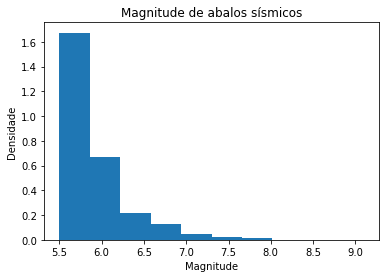

In [77]:
plot=df.Magnitude.plot.hist(title="Magnitude", normed=True)
plt.ylabel('Densidade')
plt.xlabel('Magnitude')
plt.title('Magnitude de abalos sísmicos')
plt.show()

### O histograma da Magnitude demonstra uma assimetria positiva. Isso mostra que, na maioria dos terremotos, a magnitude tende a não ser tão grande, sendo casos mais pontuais terremotos com magnitude grande. Estatísticamente, a média desse histograma é maior do que a mediana devido ao deslocamento à direita, enquanto a mediana está mais a esquerda, onde estão acumulados a maioria dos resultados.

Faça o fit de uma distribuição exponencial sobre os dados da Magnitude, achando os valores de **loc** e **scale**. Interprete loc e scale no caso da exponencial.
Documentação: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html

In [78]:
mi, sigma = stats.expon.fit(df["Magnitude"])
print(mi, sigma)

5.49999999967 0.382548648851


Refaça o Histograma plotando a fdp (função densidade de probabilidade) da exponencial com os parâmetros achados no fit em cima. Cuidado com o domínio utilizado. Interprete.

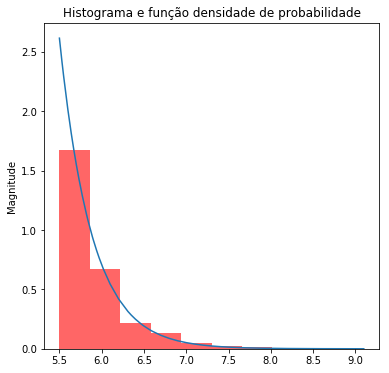

In [90]:
plt.plot(sorted(df["Magnitude"]), stats.expon.pdf(sorted(df["Magnitude"]), loc=mi, scale=sigma))
df.Magnitude.plot.hist(title='Histograma e função densidade de probabilidade', normed=1, figsize=(6,6), alpha=0.6, color='red')
plt.ylabel("Magnitude")
plt.show()

O Histograma com a fdp demonstra que quanto maior a magnitude, menor a probabilidade, confirmada por ambos plots.

## Q3 - Tabela cruzada

Faça uma tabela de cruzamento das variáveis `Hemisfério` e `Type`

Sua tabela deve ser <font color=red> normalizada</font>

In [51]:
ct=pd.crosstab(df.Hemisfério, df.Type, margins=True, rownames=['Hemisfério'], colnames=['Tipo'], normalize=True)
ct

Tipo,Earthquake,Explosion,Nuclear Explosion,Rock Burst,All
Hemisfério,,,,,
Norte,0.447140,0.000085,0.006279,0.000000,0.453505
Sul,0.545171,0.000085,0.001196,0.000043,0.546495
All,0.992311,0.000171,0.007475,0.000043,1.000000


### Q3.1 - Qual a probabilidade de ocorrer um terremoto no hemisfério norte?

Adicione na célula abaixo o cálculo:

In [52]:
P=0.447140/0.453505
P=round(P,3)
print("A probabilidade de ocorrer um terremoto no hemisfério norte é de {}%.".format(P*100))

A probabilidade de ocorrer um terremoto no hemisfério norte é de 98.6%.


Explique o seu raciocínio

O exercício pede a intersecção entre Terremotos e o Hemisfério Norte, dividido pela probabilidade de ter um acontecimento no Hemisfério Norte.

P(T∩N)/P(N)

### Q3.2 - Dado que aconteceu no Norte, qual a probabilidade de ele ter sido `Nuclear Explosion`? 

Calcule a resposta abaixo, ou explique como a encontrou

Se for cálculo preencha a célula a seguir:

In [63]:
P2=0.006279/0.453505
P2=round(P2,3)
print("A probabilidade de ocorrer uma Nuclear Explosion no hemisfério norte é de {}%.".format(P2*100))

A probabilidade de ocorrer uma Nuclear Explosion no hemisfério norte é de 1.4000000000000001%.


Se conseguir obter a resposta sem calcular, insira a resposta abaixo:

* A probabilidade de ter sido `Nuclear Explosion` é ...

## Q4 - Análise bivariada

Faça o *plot* de dispersão (*scatter plot*) entre as variáveis `Magnitude Error`  e `Depth`

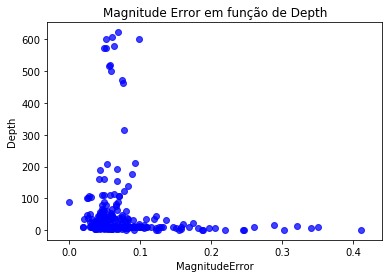

In [92]:
df.columns= ['Date', 'Time', 'Latitude', 'Longitude', 'Type', 'Depth', 'Depth Error', 'Depth Seismic Stations', 'Magnitude', 'MagnitudeType', 'MagnitudeError', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error', 'Root Mean Square', 'ID', 'Source', 'Location Source', 'Magnitude Source', 'Status', 'Hemisfério']
plt.scatter(df.MagnitudeError, df.Depth, c='b', alpha=0.75)
plt.title('Magnitude Error em função de Depth')
plt.xlabel('MagnitudeError')
plt.ylabel('Depth')

Calcule a correlação entre as variáveis `Magnitude Error`  e `Depth`

In [64]:
df.MagnitudeError.corr(df.Depth)

-0.076918438923387206

Explique o que significa o valor da correlação calculada acima? 

A correlação negativa calculada acima significa que, quanto maior a Depth (profundidade de onde o terremoto ocorre), menor o erro de Magnitude. Ou seja, a relação é inversamente proporcional. Como o número é muito mais próximo de 0 do que de -1, a correlação indica que há pouca relação de linearidade entre as duas variáveis.

## Q5 - Describe e boxplot

Faça o `describe` e o *boxplot* da `Latitude` e da `Longitude`. Explique os valores

In [16]:
df.Latitude.describe()

count    23412.000000
mean         1.679033
std         30.113183
min        -77.080000
25%        -18.653000
50%         -3.568500
75%         26.190750
max         86.005000
Name: Latitude, dtype: float64

In [17]:
df.Longitude.describe()

count    23412.000000
mean        39.639961
std        125.511959
min       -179.997000
25%        -76.349750
50%        103.982000
75%        145.026250
max        179.998000
Name: Longitude, dtype: float64

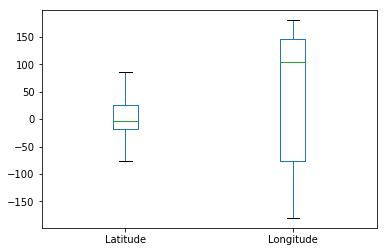

In [15]:
a10=pd.DataFrame([df.Latitude, df.Longitude],index=('Latitude', 'Longitude'))
a10=a10.T
a10.plot.box()
plt.show()

## Q6 - Tirando conclusões com base nos dados

Em um certo lugar já ocorreram abalos com *Magnitude Type* `MB` e *Type* `Nuclear Explosion`. 
 
Responda: 
    * É mais provável que tenha sido no norte ou no sul? 
    
Assuma que os Magnitude Type e Type são independentes


In [95]:
ct=pd.crosstab(df.MagnitudeType[df.Hemisfério=='Norte'], df.Type[df.Hemisfério=='Norte'])
ct2=pd.crosstab(df.MagnitudeType[df.Hemisfério=='Sul'], df.Type[df.Hemisfério=='Sul'])

ct

Type,Earthquake,Explosion,Nuclear Explosion
MagnitudeType,,,
MB,1547,2,135
MD,6,0,0
MH,5,0,0
ML,65,0,12
MS,766,0,0
MW,3684,0,0
MWB,1112,0,0
MWC,2389,0,0
MWR,12,0,0


In [96]:
ct2

Type,Earthquake,Explosion,Nuclear Explosion,Rock Burst
MagnitudeType,,,,
MB,2047,2,28,0
MS,935,0,0,0
MW,4038,0,0,0
MWB,1346,0,0,0
MWC,3279,0,0,1
MWR,14,0,0,0
MWW,1104,0,0,0


A probabilidade de ser no Norte é maior.